<br>

# `# Voting Classifier:`

- soft 
- hard 
- weighted
- hyperparameter tunning with voting
<br>

In [16]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [6]:


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df = pd.read_csv(url, names=column_names)
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:

print(f"{df.shape}")

print("*"*80)
print(f"{df.isnull().sum()}")

print("*"*80)
print(f"{df.duplicated().sum()}")

print("*"*80)
print(f"{df.describe()}")

print("*"*80)
print(f"{df.info()}")


(150, 5)
********************************************************************************
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
********************************************************************************
3
********************************************************************************
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
********************************************************************************
<class 'pandas.core.fr

In [8]:

labelEncoder = LabelEncoder()
df["species"] = labelEncoder.fit_transform(df["species"])

In [9]:
labelEncoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
80,5.5,2.4,3.8,1.1,1
45,4.8,3.0,1.4,0.3,0
24,4.8,3.4,1.9,0.2,0
63,6.1,2.9,4.7,1.4,1
17,5.1,3.5,1.4,0.3,0


<Figure size 800x1000 with 0 Axes>

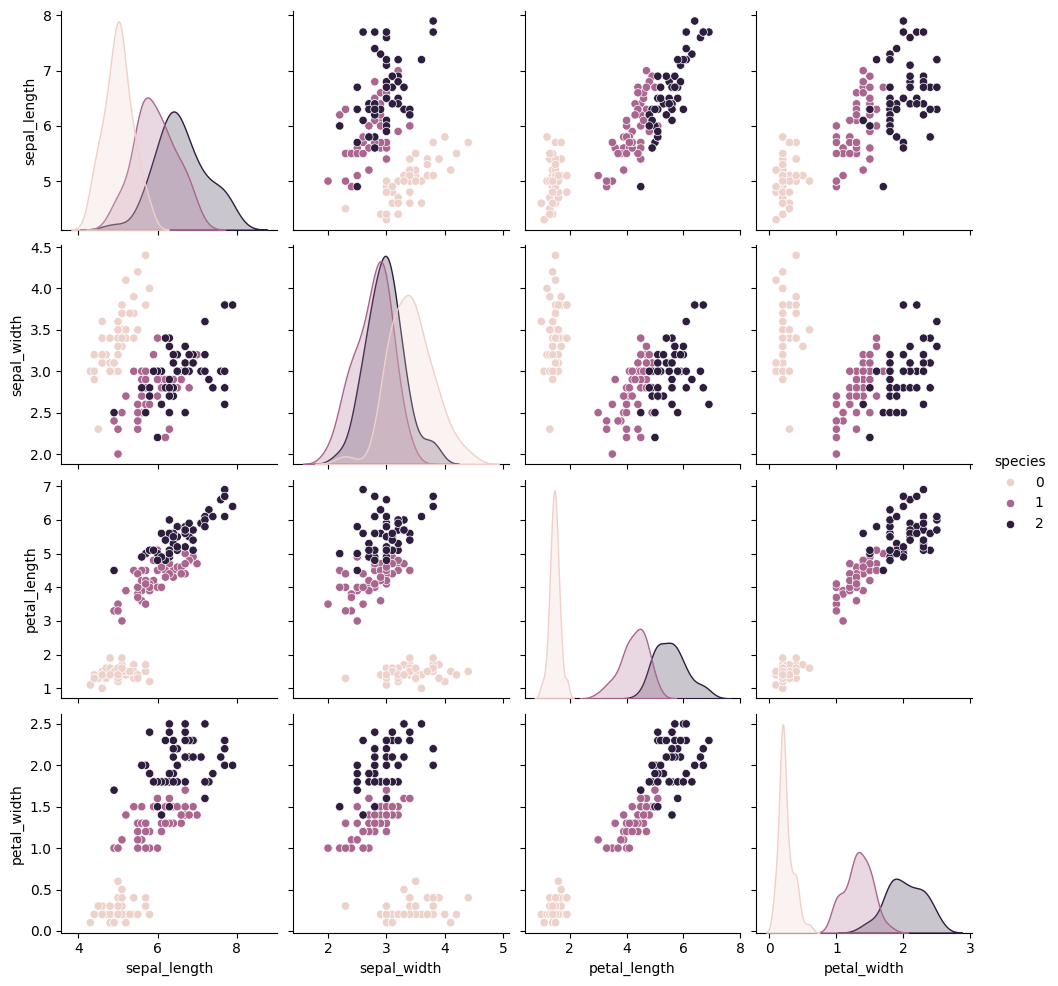

In [11]:

plt.figure(figsize=(8,10))
sns.pairplot(data=df,hue="species")

# 0-> setosa
# 1-> versicolor
# 2-> virginica


<br>
<br>

### চলো, classification কে একটু কঠিন করি । সবার উপরের গ্রাফে,  sepal_length দিয়ে যদি, versicolor and virginica কে classify করতে চায় তাহলে বিষয়টা অনেক মজার হবে । Because, we got moe than 90% accuracy with this data set so, make it dificult.

<br>
<br>


In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:

# 0 label flower is: setosa **from lableEncoder**
new_df = df[df['species'] != 0][['sepal_length','sepal_width','species']]


In [14]:

new_df.sample(5)


,sepal_length,sepal_width,species
109,7.2,3.6,2
100,6.3,3.3,2
97,6.2,2.9,1
119,6.0,2.2,2
128,6.4,2.8,2


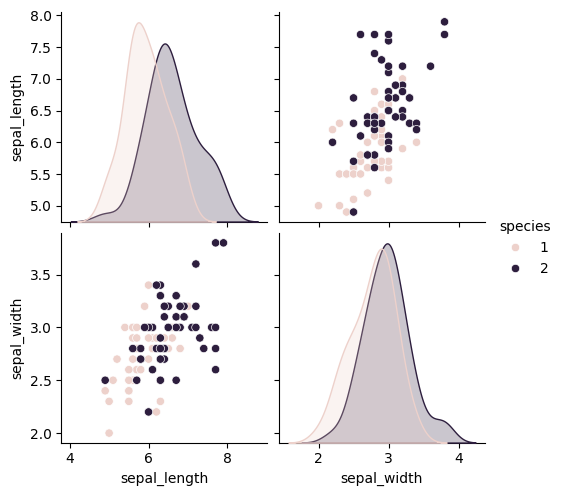

In [15]:
sns.pairplot(data=new_df,hue="species")

In [20]:

X = new_df.iloc[:,:2]
y = new_df.iloc[:,2:]


<br>
<br>

# `# Apply voting algorithrm: `

<br>
<br>

In [21]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [22]:


clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()


In [25]:

estimators = [("LoR",clf1),("KNN",clf2),("RF",clf3)]

In [38]:

# For ignoring the warnings: 
import warnings
warnings.filterwarnings("ignore")

for estimator in estimators:
    x = cross_val_score(estimator=estimator[1],X=X,y=y,cv=10,scoring="accuracy")   
    print(estimator[0],x)
    print(estimator[0],": ",np.round(np.mean(x),2))
    print()


LoR [0.5 0.7 0.8 0.8 0.8 0.5 0.9 0.8 0.9 0.8]
LoR :  0.75

KNN [0.5 0.5 0.6 0.7 0.6 0.4 0.8 0.8 0.8 0.4]
KNN :  0.61

RF [0.3 0.7 0.5 0.6 0.5 0.5 0.8 0.7 0.7 0.6]
RF :  0.59



<br>
<br>

# `# Hard Voting:`

<br>
<br>

In [41]:

vt = VotingClassifier(estimators=estimators,voting="hard")
x = cross_val_score(estimator=vt,X=X,y=y,cv=10,scoring="accuracy")
print("accuracy with hard voting: ", np.round(np.mean(x),3))


accuracy with hard voting:  0.68


<br>
<br>

# `# Soft Voting:`

<br>
<br>

In [42]:

vt = VotingClassifier(estimators=estimators,voting="soft")
x = cross_val_score(estimator=vt,X=X,y=y,cv=10,scoring="accuracy")
print("accuracy with soft voting: ", np.round(np.mean(x),3))


accuracy with soft voting:  0.66



<br>
<br>

# `# Weighted Voting:`

- We can define the weight of an classifier. Like, in our result what classifer should have more important than other.

<br>
<br>

In [44]:

# estimators = [("LoR",clf1),("KNN",clf2),("RF",clf3)]

for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting="hard",weights=[i,j,k])
            x = cross_val_score(estimator=vc,X=X,y=y,cv=10,scoring="accuracy")
            print(f"for i={i} j={j} k={k}: {np.round(np.mean(x),2)}")


for i=1 j=1 k=1: 0.67
for i=1 j=1 k=2: 0.66
for i=1 j=1 k=3: 0.61
for i=1 j=2 k=1: 0.64
for i=1 j=2 k=2: 0.68
for i=1 j=2 k=3: 0.65
for i=1 j=3 k=1: 0.61
for i=1 j=3 k=2: 0.65
for i=1 j=3 k=3: 0.67
for i=2 j=1 k=1: 0.72
for i=2 j=1 k=2: 0.67
for i=2 j=1 k=3: 0.62
for i=2 j=2 k=1: 0.68
for i=2 j=2 k=2: 0.67
for i=2 j=2 k=3: 0.68
for i=2 j=3 k=1: 0.63
for i=2 j=3 k=2: 0.68
for i=2 j=3 k=3: 0.68
for i=3 j=1 k=1: 0.75
for i=3 j=1 k=2: 0.72
for i=3 j=1 k=3: 0.68
for i=3 j=2 k=1: 0.72
for i=3 j=2 k=2: 0.68
for i=3 j=2 k=3: 0.68
for i=3 j=3 k=1: 0.67
for i=3 j=3 k=2: 0.67
for i=3 j=3 k=3: 0.68


<br>
<br>

# `# Hyperparameter tunning with: Voting`

<br>
<br>

In [ ]:


from sklearn.datasets import make_classification
from sklearn.svm import SVC

X,y = make_classification(n_samples=1000,n_features=20,n_informative=15,n_redundant=5,random_state=2)


In [47]:

svm1 = SVC(probability=True,kernel='poly',degree=1)
svm2 = SVC(probability=True,kernel='poly',degree=2)
svm3 = SVC(probability=True,kernel='poly',degree=3)
svm4 = SVC(probability=True,kernel='poly',degree=4)
svm5 = SVC(probability=True,kernel='poly',degree=5)

estimators = [("svm1",svm1),("svm2",svm2),("svm3",svm3),("svm4",svm4),("svm5",svm5)]

for estimator in estimators:
    x = cross_val_score(estimator=estimator[1],X=X,y=y,cv=10,scoring="accuracy")
    print(estimator[0],np.round(np.mean(x),2))


svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [51]:

# we got about 91% accuracy: 

vt = VotingClassifier(estimators=estimators,voting="soft")
x = cross_val_score(estimator=vt,X=X,y=y,cv=10,scoring="accuracy")
print(np.round(np.mean(x),2))


0.93
